<a href="https://colab.research.google.com/github/AravindG-4/Image_classification/blob/main/tf_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.2, random_state = 42)

In [ ]:
print(y_test.shape)
print(y_val.shape)

(8000,)
(2000,)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_image(index, x = x_train, y = y_train):
  plt.figure(figsize = (15,4))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

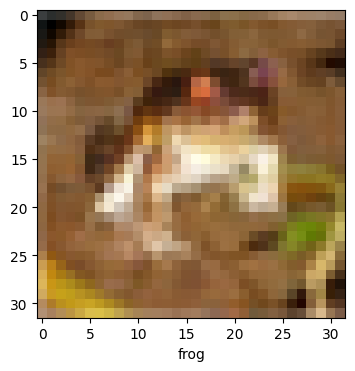

In [ ]:
plot_image(0, x_train, y_train)

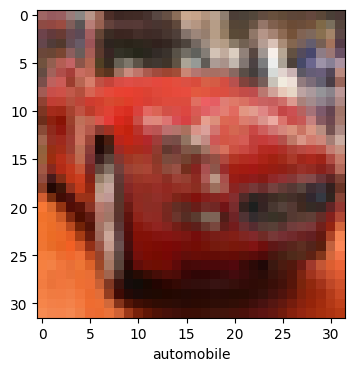

In [ ]:
plot_image(5)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

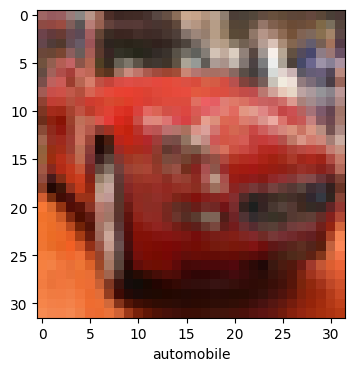

In [ ]:
plot_image(5)

ANN Model

In [ ]:
ann_model = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),

    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann_model.compile(optimizer = 'SGD',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
ann_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8127 - accuracy: 0.3545 - val_loss: 173.5227 - val_accuracy: 0.3840
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6236 - accuracy: 0.4277 - val_loss: 157.3200 - val_accuracy: 0.4320
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5419 - accuracy: 0.4570 - val_loss: 163.8345 - val_accuracy: 0.4480
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4809 - accuracy: 0.4754 - val_loss: 153.9319 - val_accuracy: 0.4680
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4316 - accuracy: 0.4969 - val_loss: 232.8081 - val_accuracy: 0.4195
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3868 - accuracy: 0.5103 - val_loss: 190.6138 - val_accuracy: 0.4690
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3477 - accuracy: 0.5271 - val_loss: 173.6128 -

In [ ]:
ann_pred = ann_model.predict(x_test)
ann_pred_classes = [np.argmax(result) for result in ann_pred]

250/250 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for ANN :\n", classification_report(y_test, ann_pred_classes))

Classification Report for ANN :
               precision    recall  f1-score   support

           0       0.79      0.42      0.55       813
           1       0.69      0.66      0.68       811
           2       0.69      0.13      0.22       799
           3       0.32      0.38      0.34       802
           4       0.62      0.32      0.42       819
           5       0.23      0.73      0.35       809
           6       0.72      0.39      0.50       787
           7       0.72      0.47      0.57       774
           8       0.62      0.73      0.67       797
           9       0.62      0.61      0.62       789

    accuracy                           0.48      8000
   macro avg       0.60      0.48      0.49      8000
weighted avg       0.60      0.48      0.49      8000



CNN Model

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn_model.compile(optimizer = 'SGD',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
cnn_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4466 - accuracy: 0.4795 - val_loss: 335.6563 - val_accuracy: 0.2995
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0688 - accuracy: 0.6233 - val_loss: 229.6244 - val_accuracy: 0.4550
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8871 - accuracy: 0.6893 - val_loss: 235.6496 - val_accuracy: 0.4495
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7473 - accuracy: 0.7389 - val_loss: 289.6331 - val_accuracy: 0.4495
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6230 - accuracy: 0.7849 - val_loss: 308.8992 - val_accuracy: 0.4875
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5031 - accuracy: 0.8264 - val_loss: 301.7300 - val_accuracy: 0.5100
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3920 - accuracy: 0.8643 - val_loss: 441.0910 -

In [ ]:
cnn_pred = cnn_model.predict(x_test)
cnn_pred_classes = [np.argmax(result) for result in cnn_pred]

250/250 [==============================] - 1s 2ms/step


In [ ]:
print("Classification report :\n", classification_report(y_test, cnn_pred_classes))

Classification report :
               precision    recall  f1-score   support

           0       0.78      0.68      0.72       813
           1       0.78      0.83      0.80       811
           2       0.49      0.64      0.56       799
           3       0.46      0.50      0.48       802
           4       0.64      0.54      0.59       819
           5       0.57      0.55      0.56       809
           6       0.75      0.73      0.74       787
           7       0.68      0.74      0.71       774
           8       0.76      0.79      0.77       797
           9       0.83      0.65      0.73       789

    accuracy                           0.66      8000
   macro avg       0.67      0.66      0.67      8000
weighted avg       0.67      0.66      0.67      8000



In [ ]:
def test(index, x = x_test, y = y_test):
  plot_image(index, x, y)
  input_img = [np.expand_dims(x[index], axis = 0)]
  print("Original Class :", classes[y[index]])
  print("ANN Predicted Class :", classes[np.argmax(ann_model.predict(input_img))])
  print("CNN Predicted Class :", classes[np.argmax(cnn_model.predict(input_img))])


In [ ]:
x_test[10].shape

(32, 32, 3)

Original Class : deer
1/1 [==============================] - 0s 56ms/step
ANN Predicted Class : deer
1/1 [==============================] - 0s 63ms/step
CNN Predicted Class : deer


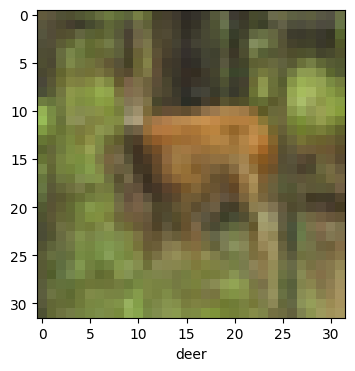

In [ ]:
test(10)

Original Class : truck
1/1 [==============================] - 0s 23ms/step
ANN Predicted Class : truck
1/1 [==============================] - 0s 19ms/step
CNN Predicted Class : truck


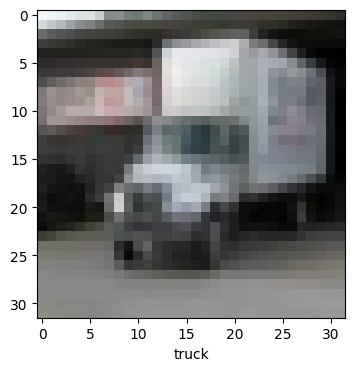

In [ ]:
test(7999)

Original Class : automobile
1/1 [==============================] - 0s 18ms/step
ANN Predicted Class : automobile
1/1 [==============================] - 0s 16ms/step
CNN Predicted Class : automobile


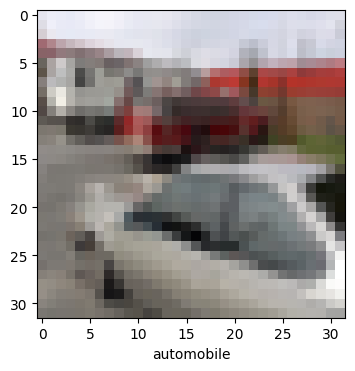

In [ ]:
test(49999, x_train, y_train)

Original Class : airplane
1/1 [==============================] - 0s 20ms/step
ANN Predicted Class : dog
1/1 [==============================] - 0s 27ms/step
CNN Predicted Class : airplane


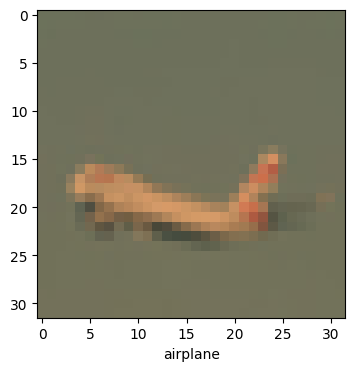

In [ ]:
test(33)

Original Class : dog
1/1 [==============================] - 0s 31ms/step
ANN Predicted Class : dog
1/1 [==============================] - 0s 29ms/step
CNN Predicted Class : dog


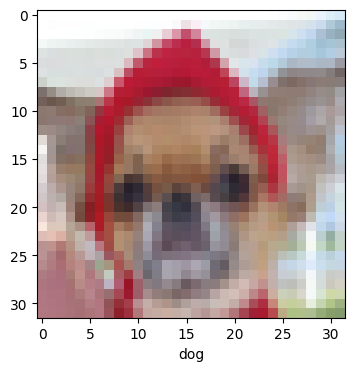

In [ ]:
test(11)

Original Class : ship
1/1 [==============================] - 0s 34ms/step
ANN Predicted Class : ship
1/1 [==============================] - 0s 45ms/step
CNN Predicted Class : ship


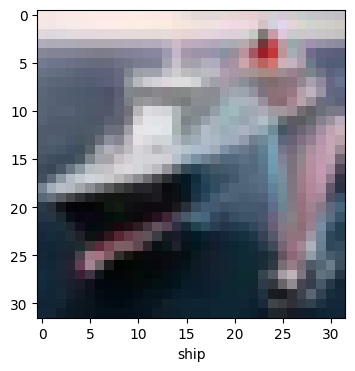

In [ ]:
test(50)